In [17]:
import sklearn
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]
 [ 1.95416454 -0.12850579]
 [ 0.93694537  0.36597075]
 [ 0.88446589 -0.47595401]
 [ 0.80950246  0.3505231 ]
 [ 1.2278091  -0.64785108]
 [-0.38454276  0.50916381]
 [ 0.09252135 -0.31618454]
 [ 1.79531658 -0.32235591]
 [ 1.43861749 -0.15796611]
 [-0.82364866  0.86822754]
 [ 0.99633397  0.1731019 ]
 [ 0.66388701  0.94659669]
 [ 0.13229471 -0.26032619]
 [ 0.2482245   0.7860477 ]
 [-1.00392102  1.15207238]
 [ 2.08208438  0.00715606]
 [ 0.87081342 -0.4366643 ]
 [ 0.37268327  1.01743002]
 [ 1.26735927 -0.11813675]
 [-0.13270154  1.26653562]
 [ 0.20331     0.19519454]
 [ 1.98373996 -0.11222315]
 [ 1.82749513 -0.03085446]
 [-0.03857867  0.0838378 ]
 [ 0.03351023  0.63113817]
 [ 0.94193283  0.63204507]
 [-0.39131894  0.40925201]
 [ 0.88357043 -0.35868845]
 [-0.01141219  0.30437635]
 [ 0.75877114  0.76057045]
 [ 1.79414416  0.28323389]
 [ 0.56116634 -0.0330033 ]
 

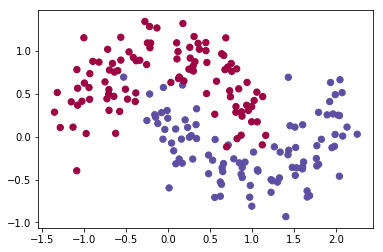

In [13]:
np.random.seed(0)
x, y = datasets.make_moons(200, noise = 0.20)
print(x, " = ", y)
plt.scatter(x[:,0],x[:,1], s=40, c = y, cmap = plt.cm.Spectral)

In [24]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [19]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x,y)

/home/iiita/anaconda3/envs/languPy36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

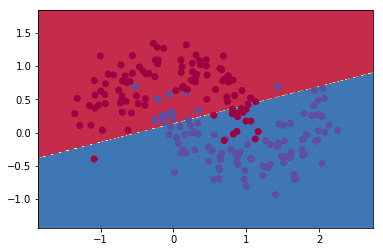

In [26]:
plot_decision_boundary(lambda x: clf.predict(x), x, y)


In [27]:
number = len(x)
nn_input_dim = 2;
nn_output_dim = 2;
epsilon = 0.01
reg_lambda = 0.01

In [58]:
def cal_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(number), y])
    data_loss = np.sum(corect_logprobs)
    return data_loss

In [59]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [60]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}
     
    for i in range(0, num_passes):
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(number), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f"%(i, cal_loss(model)))
     
    return model

In [63]:
model = build_model(7, print_loss=True)

Loss after iteration 0: 80.550950
Loss after iteration 1000: 11.945358
Loss after iteration 2000: 9.695560
Loss after iteration 3000: 8.233627
Loss after iteration 4000: 6.006291
Loss after iteration 5000: 5.098689
Loss after iteration 6000: 4.451273
Loss after iteration 7000: 4.025270
Loss after iteration 8000: 3.757570
Loss after iteration 9000: 3.603674
Loss after iteration 10000: 3.506216
Loss after iteration 11000: 3.440130
Loss after iteration 12000: 3.392776
Loss after iteration 13000: 3.356876
Loss after iteration 14000: 3.328038
Loss after iteration 15000: 3.303596
Loss after iteration 16000: 3.281996
Loss after iteration 17000: 3.262430
Loss after iteration 18000: 3.244575
Loss after iteration 19000: 3.228377


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

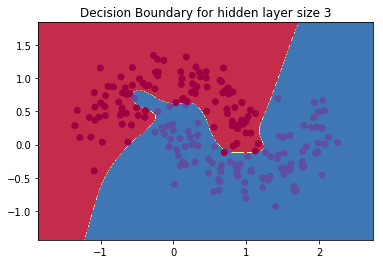

In [64]:
plot_decision_boundary(lambda x: predict(model, x), x, y)
plt.title("Decision Boundary for hidden layer size 3")